A notebook to test `pycairo` (canvas library)

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'pdf'

import cairo
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import sympy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# font options
font = {
    #'family' : 'normal',
    #'weight' : 'bold',
    'size'   : 18
}

plt.rc('font', **font)
plt.rc('lines', linewidth=2)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


In [5]:
WIDTH, HEIGHT = 256, 150

surface = cairo.ImageSurface (cairo.FORMAT_ARGB32, WIDTH, HEIGHT)
x, y, radius = (250, 250, 200)
ctx = cairo.Context(surface)
ctx.set_line_width(15)
ctx.arc(x, y, radius, 0, 2.0 * math.pi)
ctx.set_source_rgb(0.8, 0.0, 0.0)
ctx.fill_preserve()
ctx.set_source_rgb(0.0, 0, 0.7)
ctx.stroke()
buf = surface.get_data()

In [6]:
im = np.frombuffer(buf, dtype=np.uint8)
# im.shape = (HEIGHT, WIDTH, 4)
im = np.reshape(im, [HEIGHT, WIDTH, 4])
# swap axis to get r-g-b-alpha
im = im[:, :, [2, 1, 0, 3]]

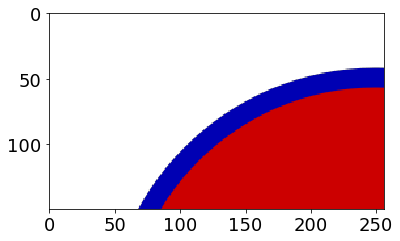

In [7]:
plt.imshow(im)